In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df1=pd.read_csv(r"/Users/souravkumarjha/Downloads/Datasets/Inflight Service_Inventory data.csv")
df2=pd.read_csv(r"/Users/souravkumarjha/Downloads/Datasets/Inflight Service_Pre order data.csv")
df3=pd.read_csv(r"/Users/souravkumarjha/Downloads/Datasets/Survey data _Customer comments.csv")
df4=pd.read_csv(r"/Users/souravkumarjha/Downloads/Datasets/Survey data_Inflight Satisfaction Score.csv")

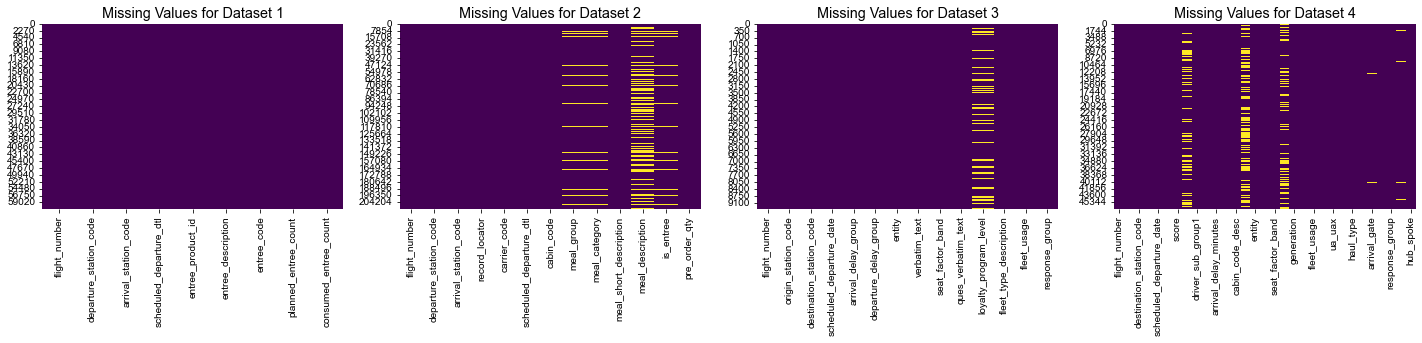

In [3]:
datasets = [df1,df2,df3,df4]
titles = ['Missing Values for Dataset 1', 'Missing Values for Dataset 2', 'Missing Values for Dataset 3',"Missing Values for Dataset 4"]
num_datasets = len(datasets)
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5))
sns.set(font_scale=1.2)
for i, (data, title) in enumerate(zip(datasets, titles)):
    missing_matrix = data.isnull()
    sns.heatmap(missing_matrix, cmap='viridis', cbar=False, ax=axes[i])
    axes[i].set_title(title)
plt.tight_layout()
plt.show()

In [30]:
df1.head(5)

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,2022-09-01,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,2022-09-01,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,2022-09-02,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,2022-09-04,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,2022-09-08,60549,Vegetarian chili and polenta cake,V,1,0


In [32]:
data=df1
# Get a list of column names with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()
columns_with_missing = data.columns[data.isnull().any()].tolist()

# Display the list of column names with missing values
print("Columns with Missing Values:")
print(columns_with_missing)

Columns with Missing Values:
[]


In [5]:
df1.shape

(61267, 9)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61267 non-null  int64 
 1   departure_station_code   61267 non-null  object
 2   arrival_station_code     61267 non-null  object
 3   scheduled_departure_dtl  61267 non-null  object
 4   entree_product_id        61267 non-null  int64 
 5   entree_description       61267 non-null  object
 6   entree_code              61267 non-null  object
 7   planned_entree_count     61267 non-null  int64 
 8   consumed_entree_count    61267 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.2+ MB


In [7]:
df1.describe()

,flight_number,entree_product_id,planned_entree_count,consumed_entree_count
count,61267.000000,61267.000000,61267.000000,61267.000000
mean,1528.316500,59595.351772,7.355248,3.155712
std,868.897413,3506.018657,6.738823,4.664430
min,23.000000,15533.000000,0.000000,-7.000000
25%,763.000000,58563.000000,3.000000,0.000000
50%,1579.000000,60983.000000,6.000000,1.000000
75%,2123.000000,60987.000000,10.000000,5.000000
max,6376.000000,62024.000000,193.000000,100.000000


Consumed Entress of items over various dates 

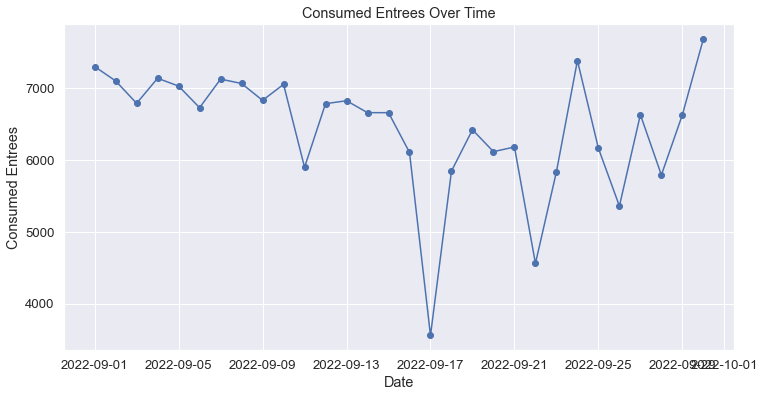

In [8]:
data = df1
data['scheduled_departure_dtl'] = pd.to_datetime(data['scheduled_departure_dtl'])
daily_consumption = data.groupby('scheduled_departure_dtl')['consumed_entree_count'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_consumption.index, daily_consumption.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Consumed Entrees')
plt.title('Consumed Entrees Over Time')
plt.grid(True)
plt.show()

Favourite item During Inflight Service from Inventory

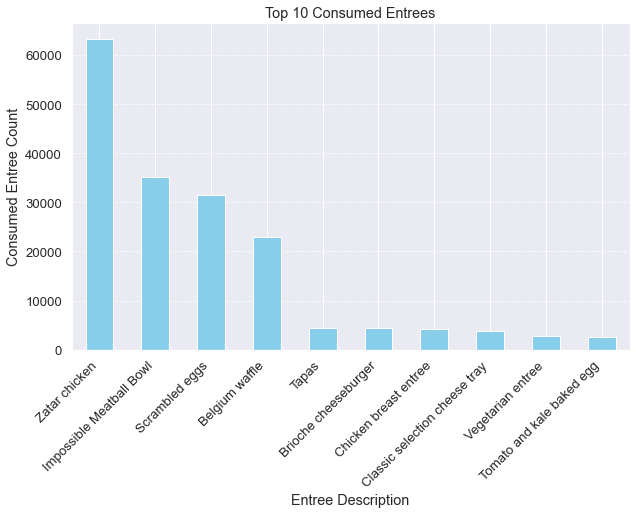

In [9]:
data=df1
top_entrees = data.groupby('entree_description')['consumed_entree_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_entrees.plot(kind='bar', color='skyblue')
plt.xlabel('Entree Description')
plt.ylabel('Consumed Entree Count')
plt.title('Top 10 Consumed Entrees')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

box plot to compare planned and consumed entree counts

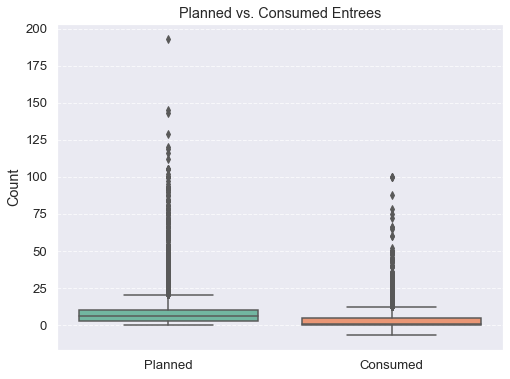

In [10]:
data=df1
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['planned_entree_count', 'consumed_entree_count']], orient='vertical', palette='Set2')
plt.ylabel('Count')
plt.title('Planned vs. Consumed Entrees')
plt.xticks([0, 1], ['Planned', 'Consumed'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df2.head(5)

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,INX,DEX,B3XX1H,UA,9/1/2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,IAX,CUX,BFXXJC,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ORX,PDX,DPXX2H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1
3,548,IAX,SFX,ELXX8H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2
4,1155,IAX,CUX,NCXX4S,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sau...,Y,2


In [33]:
data=df2
# Get a list of column names with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()
columns_with_missing = data.columns[data.isnull().any()].tolist()

# Display the list of column names with missing values
print("Columns with Missing Values:")
print(columns_with_missing)

Columns with Missing Values:
['meal_group', 'meal_category', 'meal_description', 'is_entree']


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   flight_number            212039 non-null  int64 
 1   departure_station_code   212039 non-null  object
 2   arrival_station_code     212039 non-null  object
 3   record_locator           212039 non-null  object
 4   carrier_code             212039 non-null  object
 5   scheduled_departure_dtl  212039 non-null  object
 6   cabin_code               212039 non-null  object
 7   meal_group               191728 non-null  object
 8   meal_category            191728 non-null  object
 9   meal_short_description   212039 non-null  object
 10  meal_description         137062 non-null  object
 11  is_entree                191728 non-null  object
 12  pre_order_qty            212039 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 21.0+ MB


In [13]:
df2.shape

(212039, 13)

In [14]:
df2.describe()

,flight_number,pre_order_qty
count,212039.000000,212039.000000
mean,1454.631634,1.200902
std,726.394631,0.854160
min,2.000000,0.000000
25%,732.000000,1.000000
50%,1556.000000,1.000000
75%,2090.000000,1.000000
max,2685.000000,44.000000


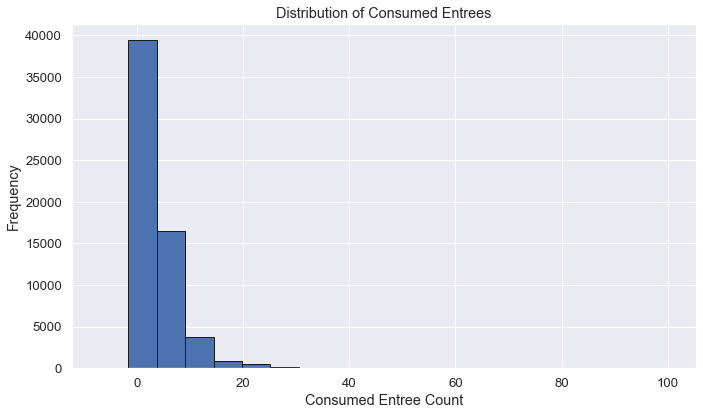

In [15]:
df=df1

# Select the 'consumed_entree_count' column
consumed_entree_count = df['consumed_entree_count']

# Create a histogram to visualize the distribution of consumed entrees
plt.figure(figsize=(10, 6))
plt.hist(consumed_entree_count, bins=20, edgecolor='k')
plt.xlabel('Consumed Entree Count')
plt.ylabel('Frequency')
plt.title('Distribution of Consumed Entrees')
plt.tight_layout()
plt.show()

Preorder on different dates

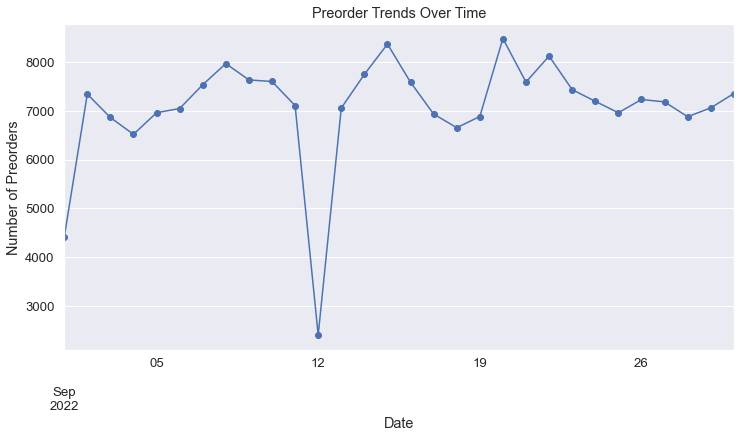

In [16]:
data=df2
data['scheduled_departure_dtl'] = pd.to_datetime(data['scheduled_departure_dtl'])
daily_preorder_count = data.groupby('scheduled_departure_dtl').size()
plt.figure(figsize=(12, 6))
daily_preorder_count.plot(marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Preorders')
plt.title('Preorder Trends Over Time')
plt.grid(True)
plt.show()

Piechart for Distribution of Meal Categories

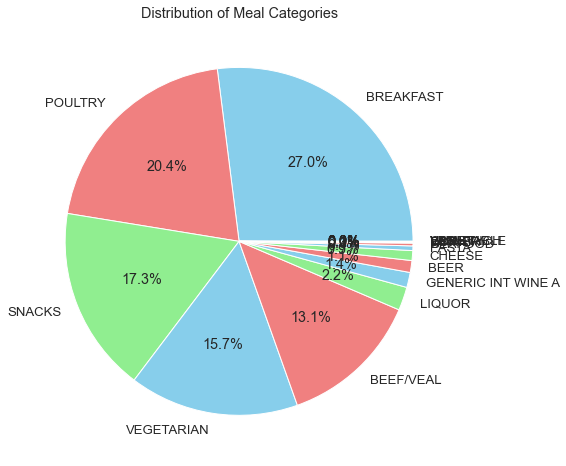

In [17]:
data=df2
plt.figure(figsize=(8, 8))
data['meal_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Meal Categories')
plt.ylabel('')
plt.show()

Meal Consumed in different class

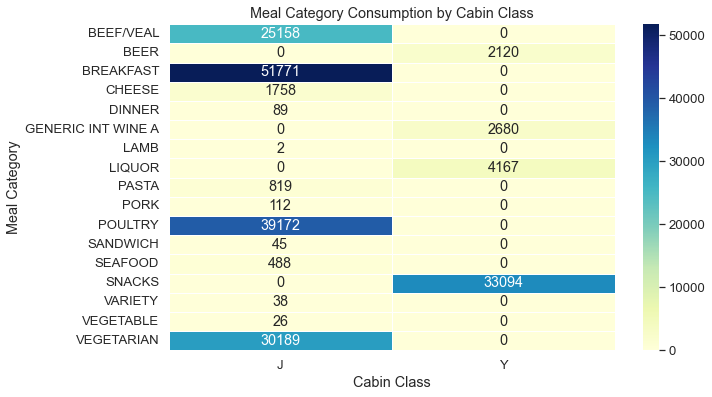

In [18]:
data=df2
cross_tab = pd.crosstab(data['meal_category'], data['cabin_code'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.xlabel('Cabin Class')
plt.ylabel('Meal Category')
plt.title('Meal Category Consumption by Cabin Class')
plt.show()

 grouped bar chart to compare availability of meal groups by 'is_entree'

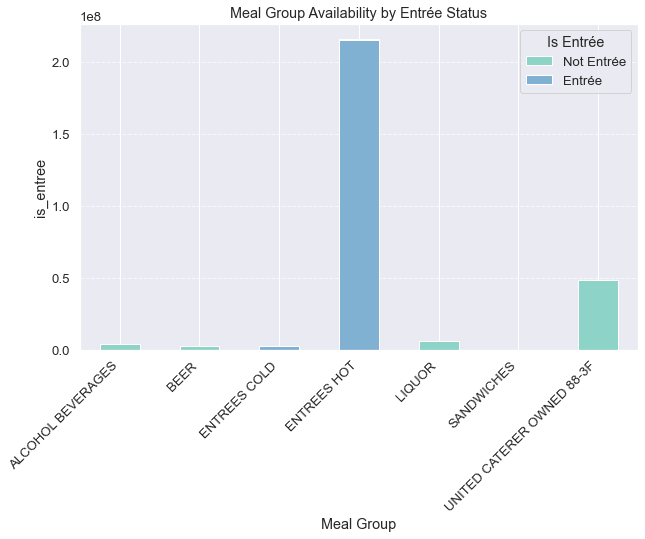

In [19]:
data=df2
grouped_data = data.groupby(['meal_group', 'is_entree']).sum().unstack().fillna(0)
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.xlabel('Meal Group')
plt.ylabel('is_entree')
plt.title('Meal Group Availability by Entrée Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Entrée', loc='upper right', labels=['Not Entrée', 'Entrée'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Group data by 'meal_group' and calculate the mean meal quantity

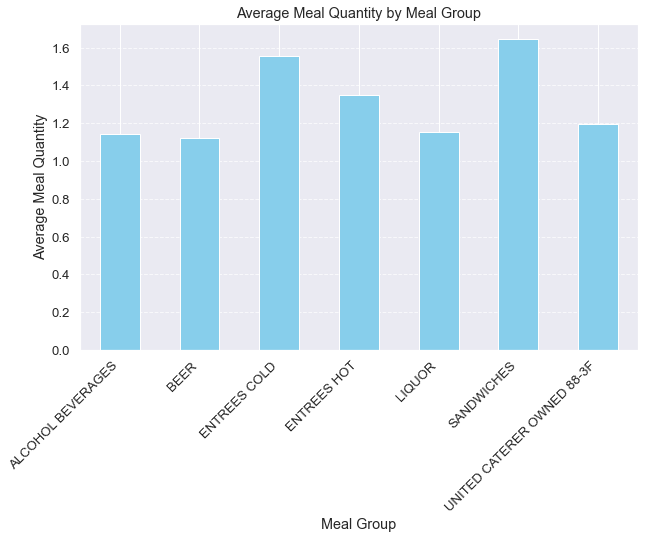

In [20]:
data=df2
grouped_data = data.groupby('meal_group')['pre_order_qty'].mean()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Meal Group')
plt.ylabel('Average Meal Quantity')
plt.title('Average Meal Quantity by Meal Group')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Select the top flights with the most consumed entrees (e.g., top 10 flights)

In [21]:
df3.head(5)

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member


In [34]:
data=df3

# Get a list of column names with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()
columns_with_missing = data.columns[data.isnull().any()].tolist()

# Display the list of column names with missing values
print("Columns with Missing Values:")
print(columns_with_missing)

Columns with Missing Values:
['loyalty_program_level']


In [22]:
df3.shape

(9424, 14)

In [23]:
df3.describe()

,flight_number
count,9424.000000
mean,1741.573430
std,1550.550037
min,2.000000
25%,614.000000
50%,1286.000000
75%,2261.000000
max,6375.000000


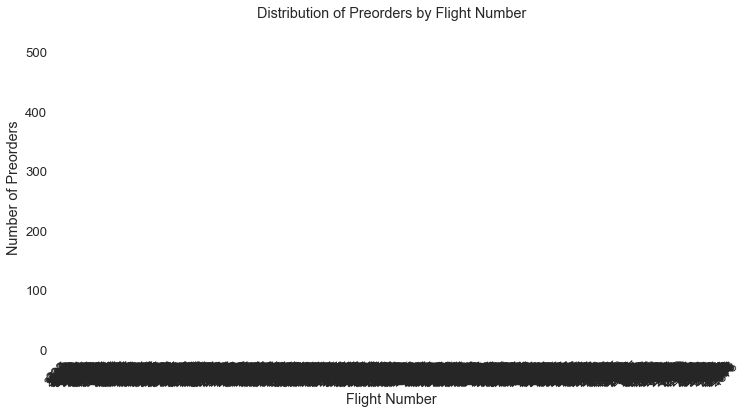

In [24]:
data=df2
# Create a bar chart for the distribution of preorders by flight number
plt.figure(figsize=(12, 6))
data['flight_number'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Flight Number')
plt.ylabel('Number of Preorders')
plt.title('Distribution of Preorders by Flight Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             9424 non-null   int64 
 1   origin_station_code       9424 non-null   object
 2   destination_station_code  9424 non-null   object
 3   scheduled_departure_date  9424 non-null   object
 4   arrival_delay_group       9424 non-null   object
 5   departure_delay_group     9424 non-null   object
 6   entity                    9424 non-null   object
 7   verbatim_text             9424 non-null   object
 8   seat_factor_band          9424 non-null   object
 9   ques_verbatim_text        9424 non-null   object
 10  loyalty_program_level     6920 non-null   object
 11  fleet_type_description    9424 non-null   object
 12  fleet_usage               9424 non-null   object
 13  response_group            9424 non-null   object
dtypes: int64(1), object(13)


Create bar charts for arrival delay groups and departure delay groups

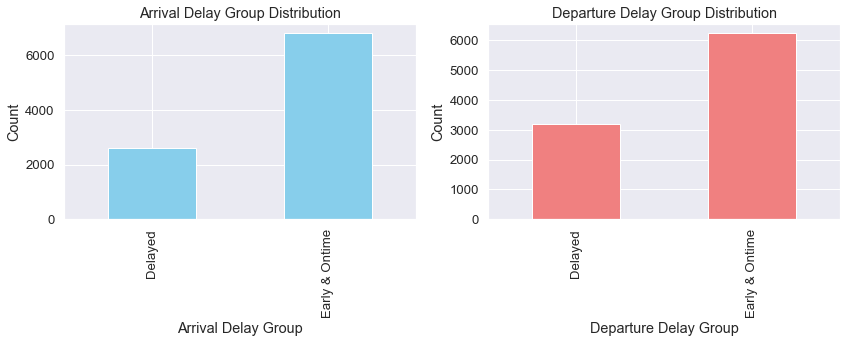

In [26]:
data=df3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['arrival_delay_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Arrival Delay Group')
plt.ylabel('Count')
plt.title('Arrival Delay Group Distribution')

plt.subplot(1, 2, 2)
data['departure_delay_group'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.xlabel('Departure Delay Group')
plt.ylabel('Count')
plt.title('Departure Delay Group Distribution')

plt.tight_layout()
plt.show()

Create a bar chart to visualize survey responses by loyalty program level

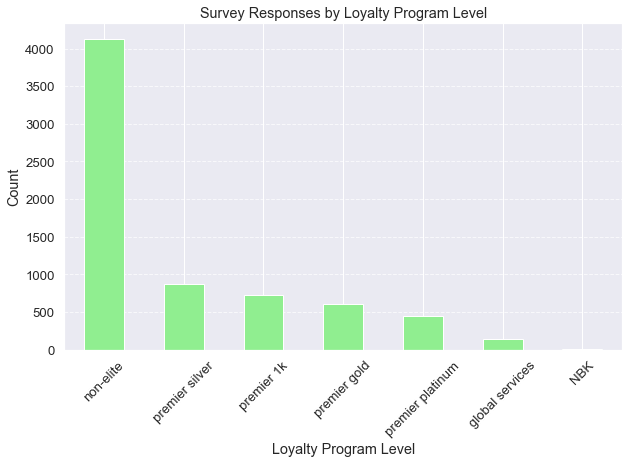

In [27]:
data=df3
plt.figure(figsize=(10, 6))
data['loyalty_program_level'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Loyalty Program Level')
plt.ylabel('Count')
plt.title('Survey Responses by Loyalty Program Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Histogram for Cabin code and Entity

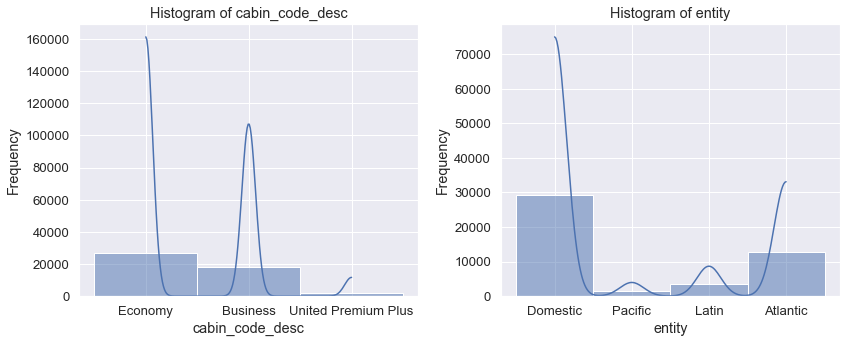

In [28]:
data = df4
attribute1 = 'cabin_code_desc'
attribute2 = 'entity'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.histplot(data[attribute1], bins=20, kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of {attribute1}')
axes[0].set_xlabel(attribute1)
axes[0].set_ylabel('Frequency')
sns.histplot(data[attribute2], bins=20, kde=True, ax=axes[1])
axes[1].set_title(f'Histogram of {attribute2}')
axes[1].set_xlabel(attribute2)
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [35]:
df4.head(5)

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   flight_number            61267 non-null  int64         
 1   departure_station_code   61267 non-null  object        
 2   arrival_station_code     61267 non-null  object        
 3   scheduled_departure_dtl  61267 non-null  datetime64[ns]
 4   entree_product_id        61267 non-null  int64         
 5   entree_description       61267 non-null  object        
 6   entree_code              61267 non-null  object        
 7   planned_entree_count     61267 non-null  int64         
 8   consumed_entree_count    61267 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 4.2+ MB


In [36]:
data=df4
columns_with_missing = data.columns[data.isnull().any()].tolist()
columns_with_missing = data.columns[data.isnull().any()].tolist()
print("Columns with Missing Values:")
print(columns_with_missing)

Columns with Missing Values:
['satisfaction_type', 'cabin_name', 'entity', 'loyalty_program_level', 'departure_gate', 'arrival_gate', 'media_provider']


In [38]:
df.shape

(61267, 9)

In [40]:
df4.describe()

,flight_number,arrival_delay_minutes,number_of_legs,actual_flown_miles
count,47074.000000,47074.000000,47074.000000,47074.000000
mean,1529.855207,-1.702490,1.344118,2477.737732
std,1456.712299,37.868177,0.502424,1865.646538
min,2.000000,-104.000000,1.000000,45.000000
25%,477.000000,-19.000000,1.000000,932.000000
50%,1050.000000,-9.000000,1.000000,1846.000000
75%,2060.000000,4.000000,2.000000,3870.000000
max,6376.000000,907.000000,3.000000,8440.000000


In [29]:
"""select 
a.flight_number,
a.departure_station_code,
a.arrival_station_code,
a.scheduled_departure_dtl,
a.entree_product_id,
a.entree_description,
a.entree_code,
a.planned_entree_count,
a.consumed_entree_count, b.flight_number,
b.departure_station_code,
b.arrival_station_code,
b.scheduled_departure_dtl,
b.record_locator,
b.meal_short_description,
b.meal_group,
b.meal_category,
b.carrier_code,
b.cabin_code,
b.meal_description,
b.is_entree,
b.meal_preorder_quantity
from Inflight_Service_Inventory_data as a join Inflight_Service_Pre_order_data as b
on a.flight_number=b.flight_number;"""
select * from Inflight_Service_pre_order_data;



SyntaxError: invalid syntax (1685333929.py, line 25)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a 'verbatim_text' column for customer comments
# Concatenate all verbatim comments into a single string
comments_text = ' '.join(data['ques_verbatim_text'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Comments')
plt.show()

In [ ]:
data=df3

# Assuming you have a 'verbatim_text' column for customer comments
# Perform sentiment analysis on the 'verbatim_text' column (you can use NLP libraries like NLTK or spaCy)
# Calculate sentiment scores and categorize comments as positive, neutral, or negative

# Create a pie chart to visualize the sentiment distribution
sentiment_counts = data['sentiment_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution in Customer Comments')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='origin_station_code', hue='destination_station_code', palette='viridis')
plt.xlabel('Arrival Station')
plt.ylabel('Count')
plt.title('Customer Comments by Flight Route (Origin to Destination)')
plt.xticks(rotation=45)
plt.legend(title='Destination Station', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import sqlite3

# Connect to an SQLite database
conn = sqlite3.connect('df1')

# Create a cursor
cursor = conn.cursor()

# Execute SQL queries
cursor.execute('SELECT * FROM df1')
result = cursor.fetchall()

# Close the connection
conn.close()

In [ ]:
df2.head()

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = [df1,df2]

# Specify the two attributes for which you want to create histograms
attribute1 = 'satisfaction_type'
attribute2 = 'entity'

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # One row, two columns

# Create the first histogram
sns.histplot(data[attribute1], bins=20, kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of {attribute1}')
axes[0].set_xlabel(attribute1)
axes[0].set_ylabel('Frequency')

# Create the second histogram
sns.histplot(data[attribute2], bins=20, kde=True, ax=axes[1])
axes[1].set_title(f'Histogram of {attribute2}')
axes[1].set_xlabel(attribute2)
axes[1].set_ylabel('Frequency')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
data = df1

correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
datasets = [df1,df2,df3,df4]
# Iterate through each dataset
for dataset_path in dataset_paths:
    print(f"Attributes with Missing Values in {dataset_path}:")
    
   
    
    # Get a list of column names with missing values
    columns_with_missing = data.columns[data.isnull().any()].tolist()
    
    # Print the list of column names with missing values
    if columns_with_missing:
        print(columns_with_missing)
    else:
        print("No missing values in this dataset.")
    
    print("\n")  # Add a newline for separation between datasets

In [ ]:
df3.head()

In [ ]:
df4.head()

In [ ]:


# Get a list of column names with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()
columns_with_missing = data.columns[data.isnull().any()].tolist()

# Display the list of column names with missing values
print("Columns with Missing Values:")
print(columns_with_missing)

In [ ]:
datasets = [df1, df2, df3,df4]
titles = ['Heatmap for Dataset 1', 'Heatmap for Dataset 2', 'Heatmap for Dataset 3',"Heatmap for Da"]
num_datasets = len(datasets)
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5))
sns.set(font_scale=1.2)
for i, (data, title) in enumerate(zip(datasets, titles)):
    sns.heatmap(data.corr(), cmap='coolwarm', annot=True, linewidths=0.5, ax=axes[i])
    axes[i].set_title(title)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()